In this notebook I tried to practice all the classification algorithms.

I load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-01-05 17:06:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.09s   

2020-01-05 17:06:51 (263 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    ca-certificates-2019.11.27 |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2019.11.27-0       anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0  anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0   anaconda
    seaborn:         0.9.0-py

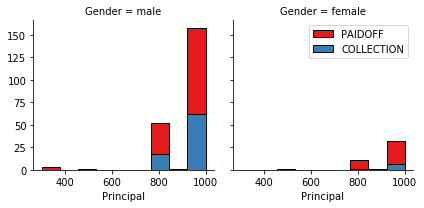

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

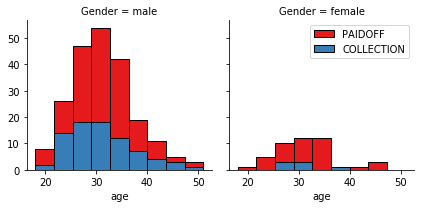

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

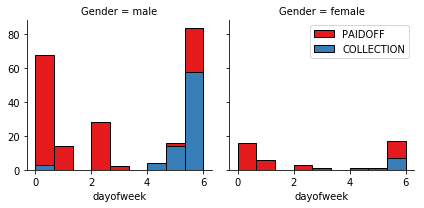

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=False)

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True) # with normalization

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


#### Lets convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

75% people with Bachelor degree, approx. 74 % of people with highschool or below education and 76.5% people with college education have paid off the loan. While in case of people with Master degree, 50% of people have paid off the loan and remaining 50 % are still in collection.

checking the number of people with each type of education.

In [18]:
print("number of people with Master or Above education = ",len(df[df.education=='Master or Above']))
print("number of people with Bachelor education = ",len(df[df.education=='Bechalor']))
print("number of people with High school or below education = ",len(df[df.education=='High School or Below']))
print("number of people with college education = ",len(df[df.education=='college']))

number of people with Master or Above education =  2
number of people with Bachelor education =  44
number of people with High school or below education =  151
number of people with college education =  149


As we can see, only 2 people have Master or above education, so we can drop them

#### Feature befor One Hot Encoding

In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True) 
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Using the training set to build an accurate model. Then using the test set to report the accuracy of the model
following algorithms are practised below:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [25]:
#splitting the train_loan.csv data into train and test sets
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [27]:
#checking the size of training and testing sets
print("size of training dataset = ",X_train.shape, y_train.shape)
print("size of testing dataset = ",X_test.shape, y_test.shape)


size of training dataset =  (242, 8) (242,)
size of testing dataset =  (104, 8) (104,)


In [28]:
# Importing required packages and evaluation methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [36]:
bestScore=0.0
accList=[] #list for storing cross-validation scores for different values of k

for k in range(3,12):
    
    model_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    scores = cross_val_score(model_knn, X_train, y_train, cv=5) # 5 fold crossvalidation
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_model=model_knn
        bestK=k
        
print("Best K is :",bestK," with Cross validation Accuracy :",bestScore)
model_knn=best_model

Best K is : 7  with Cross validation Accuracy : 0.7192665364017948


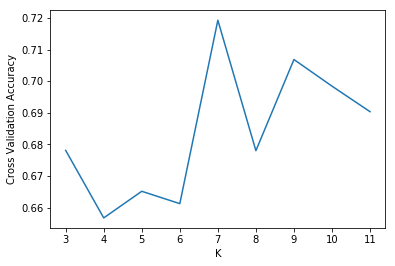

In [45]:
# visualising best k
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [46]:
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)
y_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [103]:
# defining a dictionary to collect evaluation scores of all the classifiers we use
scorescollect={}

In [104]:
scorescollect['knn-jaccard']=jaccard_similarity_score(y_test, y_pred)
scorescollect['knn-f1-score']=f1_score(y_test, y_pred, average='weighted')

In [105]:
scorescollect

{'knn-jaccard': 0.7211538461538461, 'knn-f1-score': 0.6709553683237893}

# Decision Tree

In [50]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

y_pred=model_tree.predict(X_test)
y_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [106]:
scorescollect['tree-jaccard']=jaccard_similarity_score(y_test, y_pred)
scorescollect['tree-f1-score']=f1_score(y_test, y_pred, average='weighted')

In [52]:
scorescollect

{'knn-jaccard': 0.7211538461538461,
 'knn-f1-score': 0.7064505799473422,
 'tree-jaccard': 0.7019230769230769,
 'tree-f1-score': 0.7036587595411125}

# Support Vector Machine

In [54]:
from sklearn import svm

model_svm = svm.LinearSVC(random_state=5)
model_svm.fit(X_train, y_train)  

y_pred=model_svm.predict(X_test)
y_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [107]:
scorescollect['svm-jaccard']=jaccard_similarity_score(y_test, y_pred)
scorescollect['svm-f1-score']=f1_score(y_test, y_pred, average='weighted')

In [56]:
scorescollect

{'knn-jaccard': 0.7211538461538461,
 'knn-f1-score': 0.7064505799473422,
 'tree-jaccard': 0.7019230769230769,
 'tree-f1-score': 0.7036587595411125,
 'svm-jaccard': 0.7211538461538461,
 'svm-f1-score': 0.6607793940163883}

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state=0, solver='lbfgs')
model_log.fit(X_train, y_train)

y_pred=model_log.predict(X_test)
y_prob=model_log.predict_proba(X_test)

In [108]:
scorescollect['log-jaccard']=jaccard_similarity_score(y_test, y_pred)
scorescollect['log-f1-score']=f1_score(y_test, y_pred, average='weighted')
scorescollect['log-logloss']=log_loss(y_test, y_prob)

In [61]:
scorescollect

{'knn-jaccard': 0.7211538461538461,
 'knn-f1-score': 0.7064505799473422,
 'tree-jaccard': 0.7019230769230769,
 'tree-f1-score': 0.7036587595411125,
 'svm-jaccard': 0.7211538461538461,
 'svm-f1-score': 0.6607793940163883,
 'log-jaccard': 0.7211538461538461,
 'log-f1-score': 0.6709553683237893,
 'log-logloss': 0.4832140732185745}

# Model Evaluation using Test set

In [62]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [63]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-01-05 18:16:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-01-05 18:16:00 (416 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [84]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Preparing the test set in the same format as we used for the training. So repeating the preprocessing steps, which we did earlier for training the models

In [85]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [86]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [87]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [88]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [89]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True) 
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [90]:
test_X=test_Feature.values
test_X[0:5]

array([[1000,   30,   50,    1,    0,    1,    0,    0],
       [ 300,    7,   35,    0,    1,    0,    0,    0],
       [1000,   30,   43,    1,    1,    0,    1,    0],
       [1000,   30,   26,    0,    1,    0,    0,    1],
       [ 800,   15,   29,    0,    1,    1,    0,    0]])

In [91]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [92]:
test_X= preprocessing.StandardScaler().fit_transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [93]:
test_X.shape, test_y.shape

((54, 8), (54,))

In [94]:
test_scorescollect={} # defining dictionary for collecting the test scores

In [97]:
knn_pred=model_knn.predict(test_X)
test_scorescollect['knn-jaccard']=jaccard_similarity_score(test_y, knn_pred)
test_scorescollect['knn-f1-score']=f1_score(test_y, knn_pred, average='weighted')

In [98]:
tree_pred=model_tree.predict(test_X)
test_scorescollect['tree-jaccard']=jaccard_similarity_score(test_y, tree_pred)
test_scorescollect['tree-f1-score']=f1_score(test_y, tree_pred, average='weighted')

In [99]:
svm_pred=model_svm.predict(test_X)
test_scorescollect['svm-jaccard']=jaccard_similarity_score(test_y, svm_pred)
test_scorescollect['svm-f1-score']=f1_score(test_y, svm_pred, average='weighted')

In [102]:
log_pred=model_log.predict(test_X)
log_prob=model_log.predict_proba(test_X)
test_scorescollect['log-jaccard']=jaccard_similarity_score(test_y, log_pred)
test_scorescollect['log-f1-score']=f1_score(test_y, log_pred, average='weighted')
test_scorescollect['log-logloss']=log_loss(test_y, log_prob)

#### The scores on the Loan_train.csv dataset

In [109]:
scorescollect

{'knn-jaccard': 0.7211538461538461,
 'knn-f1-score': 0.6709553683237893,
 'tree-jaccard': 0.7211538461538461,
 'tree-f1-score': 0.6709553683237893,
 'svm-jaccard': 0.7211538461538461,
 'svm-f1-score': 0.6709553683237893,
 'log-jaccard': 0.7211538461538461,
 'log-f1-score': 0.6709553683237893,
 'log-logloss': 0.4832140732185745}

#### The scores on the Loan_test.csv dataset

In [110]:
test_scorescollect

{'knn-jaccard': 0.7222222222222222,
 'knn-f1-score': 0.6871008939974457,
 'tree-jaccard': 0.7407407407407407,
 'tree-f1-score': 0.7407407407407407,
 'svm-jaccard': 0.7592592592592593,
 'svm-f1-score': 0.6717642373556352,
 'log-jaccard': 0.7592592592592593,
 'log-f1-score': 0.6717642373556352,
 'log-logloss': 0.47415542947636713}

In [111]:
from sklearn.metrics import confusion_matrix
knn_confmatrix=confusion_matrix(test_y, knn_pred)
knn_confmatrix

array([[ 3, 11],
       [ 4, 36]])

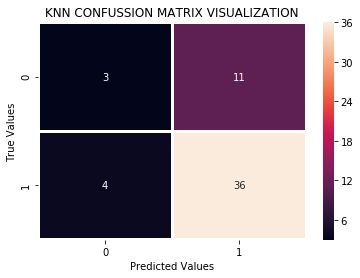

In [120]:
sns.heatmap(knn_confmatrix,annot=True,lw =2,cbar=True)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("KNN CONFUSSION MATRIX VISUALIZATION")
plt.show()

Correct predictions in knn classifier = 36+3 =39

Incorrect predictions in knn classifier = 11+4 = 15

In [112]:
svm_confmatrix=confusion_matrix(test_y, svm_pred)
svm_confmatrix

array([[ 1, 13],
       [ 0, 40]])

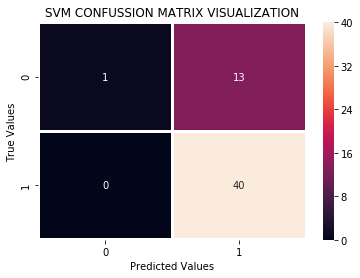

In [119]:
sns.heatmap(svm_confmatrix,annot=True,lw =2,cbar=True)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("SVM CONFUSSION MATRIX VISUALIZATION")
plt.show()

Correct predictions in svm classifier = 40+1 =41

Incorrect predictions in svm classifier = 13+0 = 13

In [121]:
tree_confmatrix=confusion_matrix(test_y, tree_pred)
tree_confmatrix

array([[ 7,  7],
       [ 7, 33]])

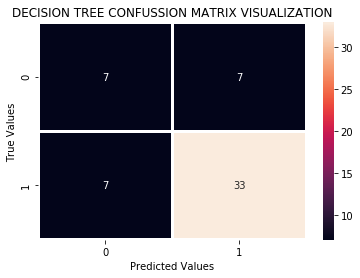

In [122]:
sns.heatmap(tree_confmatrix,annot=True,lw =2,cbar=True)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("DECISION TREE CONFUSSION MATRIX VISUALIZATION")
plt.show()

Correct predictions in decision tree classifier = 33+7 =40

Incorrect predictions in decision tree classifier = 7+7 = 14

In [114]:
log_confmatrix=confusion_matrix(test_y, log_pred)
log_confmatrix

array([[ 1, 13],
       [ 0, 40]])

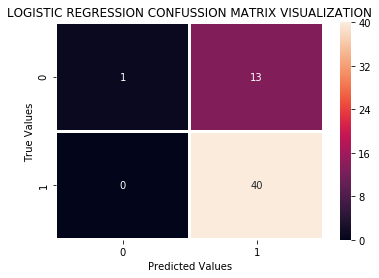

In [123]:
sns.heatmap(log_confmatrix,annot=True,lw =2,cbar=True)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("LOGISTIC REGRESSION CONFUSSION MATRIX VISUALIZATION")
plt.show()

Correct predictions in Logistic regression classifier = 40+1 =41

Incorrect predictions in Logistic regression classifier = 13+0 = 13

# Report


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.72222       | 0.68710        | NA      |
| Decision Tree      | 0.74074       | 0.74074        | NA      |
| SVM                | 0.75925       | 0.67176        | NA      |
| LogisticRegression | 0.75925       | 0.67176        | 0.47415       |

# Thank you for your time